<a href="https://colab.research.google.com/github/DannyML-DSC/Hash-analytics/blob/master/Attrition_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#authenticatiopn script in gcp
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!apt-get install software-properties-common

!apt-get install -y -qq software-properties-common module-init-tools

!apt-get install -y -qq python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.goog

In [0]:
#script for reading data from google drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
#we import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure


In [0]:
data_stayed = pd.read_excel('drive//app//Employee.xlsx', sheet_name='Stayed' )

In [0]:
data_stayed.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.58,0.74,4,215,3,0,0,sales,low,1
1,2,0.82,0.67,2,202,3,0,0,sales,low,1
2,3,0.45,0.69,5,193,3,0,0,sales,low,1
3,4,0.78,0.82,5,247,3,0,0,sales,low,1


In [0]:
data_left = pd.read_excel('drive//app//Employee.xlsx', sheet_name='Left')

In [0]:
data_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,Attrition
0,5,0.38,0.53,2,157,3,0,0,sales,low,0
1,6,0.80,0.86,5,262,6,0,0,sales,medium,0
2,7,0.11,0.88,7,272,4,0,0,sales,medium,0
3,8,0.72,0.87,5,223,5,0,0,sales,low,0


In [0]:
 data = pd.concat([data_stayed,data_left], axis=0, ignore_index=True)

In [0]:
data.to_csv('drive//app//Employee.csv')

In [0]:
df = pd.read_csv('drive//app//Employee.csv', index_col=0)

In [0]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,Attrition
0,1,0.58,0.74,4,215,3,0,0,sales,low,1
1,2,0.82,0.67,2,202,3,0,0,sales,low,1
2,3,0.45,0.69,5,193,3,0,0,sales,low,1
3,4,0.78,0.82,5,247,3,0,0,sales,low,1
4,5,0.38,0.53,2,157,3,0,0,sales,low,0


In [0]:
#Data description
data.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,Attrition
count,8.00000,8.00000,8.000000,8.000000,8.000000,8.000000,8.0,8.0,8.000000
mean,4.50000,0.58000,0.757500,4.375000,221.375000,3.750000,0.0,0.0,0.500000
std,2.44949,0.25168,0.123259,1.685018,38.243347,1.164965,0.0,0.0,0.534522
min,1.00000,0.11000,0.530000,2.000000,157.000000,3.000000,0.0,0.0,0.000000
25%,2.75000,0.43250,0.685000,3.500000,199.750000,3.000000,0.0,0.0,0.000000
50%,4.50000,0.65000,0.780000,5.000000,219.000000,3.000000,0.0,0.0,0.500000
75%,6.25000,0.78500,0.862500,5.000000,250.750000,4.250000,0.0,0.0,1.000000
max,8.00000,0.82000,0.880000,7.000000,272.000000,6.000000,0.0,0.0,1.000000


In [0]:
df = df.sample(frac=1)

In [0]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,dept,salary,Attrition
5,6,0.80,0.86,5,262,6,0,0,sales,medium,0
3,4,0.78,0.82,5,247,3,0,0,sales,low,1
2,3,0.45,0.69,5,193,3,0,0,sales,low,1
0,1,0.58,0.74,4,215,3,0,0,sales,low,1
4,5,0.38,0.53,2,157,3,0,0,sales,low,0


In [0]:
df.columns

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'dept', 'salary', 'Attrition'],
      dtype='object')

In [0]:
df.drop('Emp ID', axis=1, inplace=True)

In [0]:
df.reset_index(inplace=True)

In [0]:
df.drop('index', axis =1, inplace=True)

In [0]:
df.drop('work_accident' , axis=1, inplace=True)

In [0]:
df.drop('promotion_last_5years', axis=1, inplace=True)

In [0]:
df.drop('dept', axis=1, inplace=True)

In [0]:
df.head(100)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary,Attrition
0,0.80,0.86,5,262,6,medium,0
1,0.78,0.82,5,247,3,low,1
2,0.45,0.69,5,193,3,low,1
3,0.58,0.74,4,215,3,low,1
4,0.38,0.53,2,157,3,low,0
5,0.72,0.87,5,223,5,low,0
6,0.82,0.67,2,202,3,low,1
7,0.11,0.88,7,272,4,medium,0


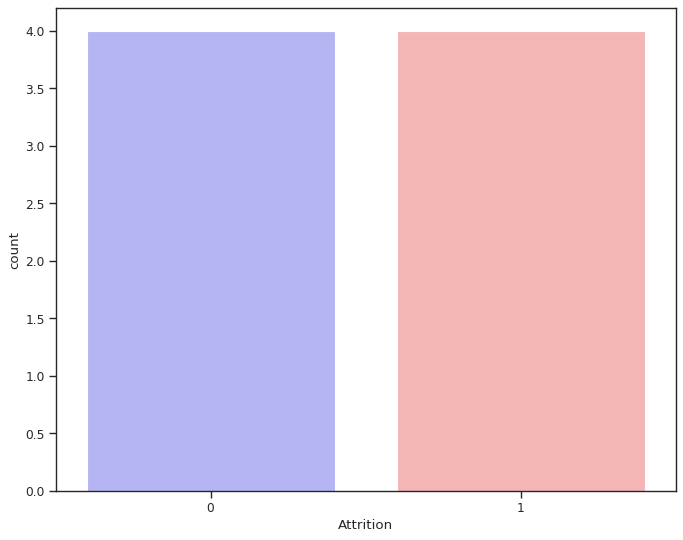

In [0]:
#calculating the total number of those that left and stayed in the company
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

sns.set(style="ticks")
f = sns.countplot(x="Attrition", data=df, palette="bwr")
plt.show()

In [0]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'salary', 'Attrition'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
#encoding categorical values to enable proper assesment of our python scriptand ML model.
le = LabelEncoder()

df['salary'] = le.fit_transform(df.salary)

In [0]:
df.head(100)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,salary,Attrition
0,0.80,0.86,5,262,6,1,0
1,0.78,0.82,5,247,3,0,1
2,0.45,0.69,5,193,3,0,1
3,0.58,0.74,4,215,3,0,1
4,0.38,0.53,2,157,3,0,0
5,0.72,0.87,5,223,5,0,0
6,0.82,0.67,2,202,3,0,1
7,0.11,0.88,7,272,4,1,0


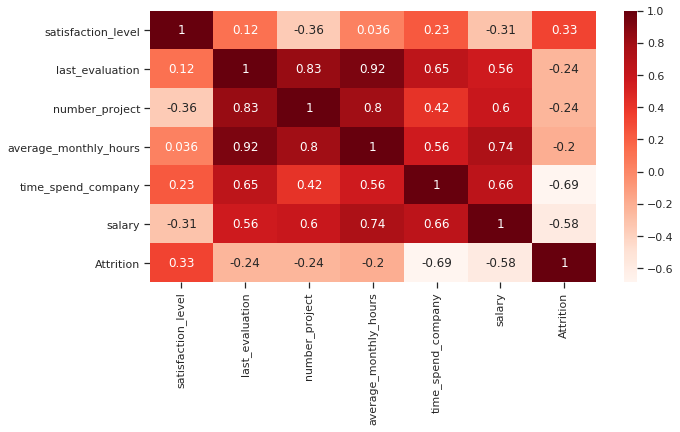

In [0]:
#feature selection using pearson correlation. values with correlation value close to +1 are positively correlated
#Using Pearson Correlation, we deduce that the only value with a high correlation of 0.33
#satisfaction_level, is highly correlated to attrition
#meaning that the status of an employee in a copany is dependent on the level of satisfaction the employee has gotten in the company
plt.figure(figsize=(10,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:

def feature_engine():

  #Correlation with output variable
  cor_target = abs(cor["Attrition"])
  #Selecting highly correlated features
  relevant_features = cor_target[cor_target>0.3]
 
  df_features = pd.DataFrame({'relevant_features': relevant_features})

  print(df_features.sort_values(ascending=False, by='relevant_features'))



feature_engine()

                    relevant_features
Attrition                    1.000000
time_spend_company           0.688247
salary                       0.577350
satisfaction_level           0.329192


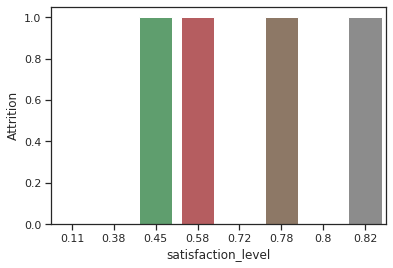

In [0]:
 #visual comparism between satisfaction level and Attrition
 #it can be seen that employees with a satisfaction level greater than
 #0.3 are more satisfied in the company and arent likely to leave attall.
 
viz = sns.barplot(x= "satisfaction_level", y = "Attrition", data = df )

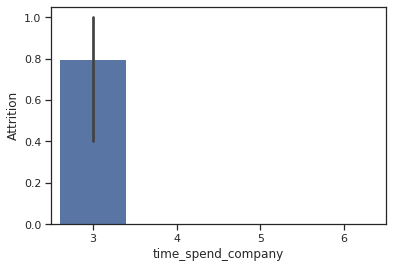

In [0]:
#since time spent in comapny had d high correlation as well, we plot it agfainst attrition and anayse the possibilities.
viz2 = sns.barplot(x= "time_spend_company", y="Attrition", data=df)

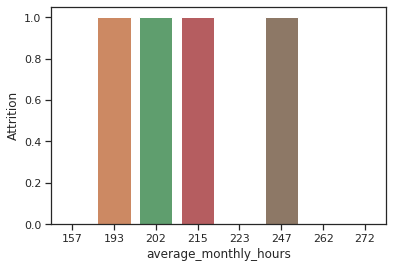

In [0]:
viz2 = sns.barplot(x= "average_monthly_hours", y="Attrition", data=df)

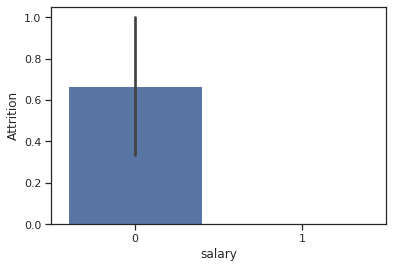

In [0]:
viz3 = sns.barplot(x= "salary", y="Attrition", data=df)

In [0]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'salary']]
Y = df[['Attrition']]

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

X = sc.fit_transform(X)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
X_train

array([[ 8.49526919e-01,  5.42071112e-01,  3.96525793e-01,
         7.16314853e-01, -6.88247202e-01, -5.77350269e-01],
       [-1.99638826e+00,  1.06245938e+00,  1.66540833e+00,
         1.41515861e+00,  2.29415734e-01,  1.73205081e+00],
       [-4.71582173e-16, -1.51779911e-01, -2.37915476e-01,
        -1.78205158e-01, -6.88247202e-01, -5.77350269e-01],
       [ 9.34479611e-01,  8.88996624e-01,  3.96525793e-01,
         1.13562111e+00,  2.06474160e+00,  1.73205081e+00],
       [ 5.94668843e-01,  9.75728002e-01,  3.96525793e-01,
         4.54248443e-02,  1.14707867e+00, -5.77350269e-01],
       [-8.49526919e-01, -1.97313885e+00, -1.50679801e+00,
        -1.79952268e+00, -6.88247202e-01, -5.77350269e-01]])

In [0]:
Y_train

,Attrition
1,1
7,0
3,1
0,0
5,0
4,0


In [0]:
X_test

array([[ 1.0194323 , -0.75889956, -1.50679801, -0.54160391, -0.6882472 ,
        -0.57735027],
       [-0.5521925 , -0.5854368 ,  0.39652579, -0.79318767, -0.6882472 ,
        -0.57735027]])

In [0]:
Y_test

,Attrition
6,1
2,1


In [0]:
model = LogisticRegression()

In [0]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
prediction = model.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score


In [0]:
acc = accuracy_score(Y_test, prediction)


In [0]:
acc

0.5